In [110]:
from numpy import *
import numpy as np
import operator
import matplotlib
import matplotlib.pyplot as plt
from os import listdir #导入能处理文件目录的包

In [2]:
def creatDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

In [14]:
#kNN分类器：（待分类数据，训练集，训练集标签结果，k值）
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet #tile用于构造矩阵，此处构造出了inX重复dataSetSize次的矩阵
    sqDiffMat = diffMat**2 #平方
    sqDistances = sqDiffMat.sum(axis=1) #求出到每一个点的距离的平方和
    distances = sqDistances**0.5 #开方
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]] #当前比对值的标签
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1 #当前类别计数+1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1),reverse = True) #对前k个相似的对象所属分类进行排序
    return sortedClassCount[0][0] 

In [8]:
group,labels = creatDataSet()

In [15]:
classify0([0,0],group,labels,3)

'B'

In [18]:
#将文件中的数据读入矩阵中
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = zeros((numberOfLines,3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip() #移除字符串首位制定字符，默认空格换行
        listFromLine = line.split('\t') #把解析的数字直接放到列表中
        returnMat[index,:] = listFromLine[0:3] #把这个列表的数据赋值给对应行
        classLabelVector.append(int(listFromLine[-1])) #把最后一行，喜欢或不喜欢的分类标签读取出来
        index += 1
    return returnMat, classLabelVector

In [21]:
datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
datingDataMat


array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

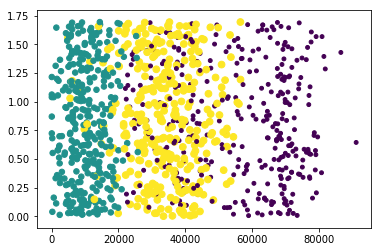

In [44]:
#绘制散点图
fig = plt.figure()
ax = fig.add_subplot(111) #画布拆分为一行一列，子图放在第一个的位置
ax.scatter(datingDataMat[:,0], datingDataMat[:,2], 15.0*array(datingLabels), 15.0*array(datingLabels))
plt.show()

In [47]:
#归一化特征值
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0] #列数
    normDataSet = dataSet - tile(minVals,(m,1))
    normDataSet = normDataSet/tile(ranges,(m,1))
    return normDataSet, ranges, minVals
    

In [93]:
#分类效果测试
def datingClassTest(k):
    hoRatio = 0.10
    #读入文件更改处
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    normMat = np.array(normMat)
    datingLabels = np.array(datingLabels)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio) #测试集大小
    errorCount = 0.0
    #直接取前*个做测试集
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],k)
        print("the classifier came back with %d, the real answer is: %d"%(classifierResult,datingLabels[i]))
        if (classifierResult != datingLabels[i]):
            errorCount += 1
    print ("the total error rate is : %f"%(errorCount/float(numTestVecs)))

In [101]:
#将文本表示的图像转为向量,此处得到一个手写数字的vec
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [128]:
def handwritingClassTest(k):
    hwLabels = []
    trainingFileList = listdir('trainingDigits')
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    #从文件名中解析出当前数字的分类结果
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0] #去掉txt
        classNumStr = int(fileStr.split('_')[0]) #取最开始的数字部分
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = listdir('testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels,k)
        
        if (classifierResult != classNumStr):
            errorCount += 1
            print ("**the classifier came back with %d, the real answer is : %d" %(classifierResult, classNumStr))
        else:
            print ("the classifier came back with %d, the real answer is : %d" %(classifierResult, classNumStr))
    print("the total error rate is: %f" % (errorCount/float(mTest)))

In [129]:
handwritingClassTest(3)


the classifier came back with 4, the real answer is : 4
the classifier came back with 4, the real answer is : 4
the classifier came back with 3, the real answer is : 3
the classifier came back with 9, the real answer is : 9
the classifier came back with 0, the real answer is : 0
the classifier came back with 0, the real answer is : 0
the classifier came back with 9, the real answer is : 9
the classifier came back with 7, the real answer is : 7
the classifier came back with 7, the real answer is : 7
the classifier came back with 0, the real answer is : 0
the classifier came back with 3, the real answer is : 3
the classifier came back with 2, the real answer is : 2
the classifier came back with 2, the real answer is : 2
the classifier came back with 5, the real answer is : 5
the classifier came back with 5, the real answer is : 5
the classifier came back with 5, the real answer is : 5
the classifier came back with 2, the real answer is : 2
the classifier came back with 6, the real answer

the classifier came back with 2, the real answer is : 2
the classifier came back with 0, the real answer is : 0
the classifier came back with 9, the real answer is : 9
the classifier came back with 0, the real answer is : 0
the classifier came back with 0, the real answer is : 0
the classifier came back with 9, the real answer is : 9
the classifier came back with 7, the real answer is : 7
the classifier came back with 7, the real answer is : 7
the classifier came back with 0, the real answer is : 0
the classifier came back with 9, the real answer is : 9
the classifier came back with 7, the real answer is : 7
the classifier came back with 4, the real answer is : 4
the classifier came back with 3, the real answer is : 3
the classifier came back with 4, the real answer is : 4
the classifier came back with 3, the real answer is : 3
the classifier came back with 4, the real answer is : 4
the classifier came back with 3, the real answer is : 3
the classifier came back with 4, the real answer

the classifier came back with 1, the real answer is : 1
the classifier came back with 8, the real answer is : 8
the classifier came back with 8, the real answer is : 8
the classifier came back with 1, the real answer is : 1
the classifier came back with 6, the real answer is : 6
the classifier came back with 6, the real answer is : 6
the classifier came back with 2, the real answer is : 2
the classifier came back with 5, the real answer is : 5
the classifier came back with 2, the real answer is : 2
the classifier came back with 2, the real answer is : 2
the classifier came back with 7, the real answer is : 7
the classifier came back with 9, the real answer is : 9
the classifier came back with 0, the real answer is : 0
the classifier came back with 0, the real answer is : 0
the classifier came back with 4, the real answer is : 4
the classifier came back with 4, the real answer is : 4
the classifier came back with 3, the real answer is : 3
the classifier came back with 8, the real answer

the classifier came back with 5, the real answer is : 5
the classifier came back with 2, the real answer is : 2
the classifier came back with 6, the real answer is : 6
the classifier came back with 1, the real answer is : 1
the classifier came back with 8, the real answer is : 8
the classifier came back with 6, the real answer is : 6
the classifier came back with 8, the real answer is : 8
the classifier came back with 1, the real answer is : 1
the classifier came back with 1, the real answer is : 1
the classifier came back with 8, the real answer is : 8
the classifier came back with 6, the real answer is : 6
the classifier came back with 0, the real answer is : 0
the classifier came back with 1, the real answer is : 1
the classifier came back with 1, the real answer is : 1
the classifier came back with 1, the real answer is : 1
**the classifier came back with 7, the real answer is : 1
the classifier came back with 0, the real answer is : 0
the classifier came back with 1, the real answ

the classifier came back with 4, the real answer is : 4
the classifier came back with 4, the real answer is : 4
the classifier came back with 3, the real answer is : 3
the classifier came back with 4, the real answer is : 4
the classifier came back with 6, the real answer is : 6
the classifier came back with 7, the real answer is : 7
the classifier came back with 0, the real answer is : 0
the classifier came back with 7, the real answer is : 7
the classifier came back with 9, the real answer is : 9
the classifier came back with 9, the real answer is : 9
the classifier came back with 0, the real answer is : 0
the classifier came back with 9, the real answer is : 9
the classifier came back with 4, the real answer is : 4
the classifier came back with 5, the real answer is : 5
the classifier came back with 5, the real answer is : 5
the classifier came back with 2, the real answer is : 2
the classifier came back with 2, the real answer is : 2
the classifier came back with 5, the real answer

the classifier came back with 9, the real answer is : 9
the classifier came back with 6, the real answer is : 6
the classifier came back with 1, the real answer is : 1
the classifier came back with 1, the real answer is : 1
the classifier came back with 8, the real answer is : 8
the classifier came back with 6, the real answer is : 6
the classifier came back with 1, the real answer is : 1
the classifier came back with 7, the real answer is : 7
the classifier came back with 7, the real answer is : 7
the classifier came back with 1, the real answer is : 1
the classifier came back with 1, the real answer is : 1
the classifier came back with 6, the real answer is : 6
the classifier came back with 8, the real answer is : 8
the classifier came back with 6, the real answer is : 6
the classifier came back with 1, the real answer is : 1
the classifier came back with 9, the real answer is : 9
the classifier came back with 8, the real answer is : 8
the classifier came back with 5, the real answer

the classifier came back with 2, the real answer is : 2
the classifier came back with 2, the real answer is : 2
the classifier came back with 5, the real answer is : 5
the classifier came back with 5, the real answer is : 5
the classifier came back with 9, the real answer is : 9
the classifier came back with 3, the real answer is : 3
the classifier came back with 7, the real answer is : 7
the classifier came back with 7, the real answer is : 7
the classifier came back with 9, the real answer is : 9
the classifier came back with 0, the real answer is : 0
the classifier came back with 0, the real answer is : 0
the classifier came back with 4, the real answer is : 4
the classifier came back with 9, the real answer is : 9
the classifier came back with 7, the real answer is : 7
the classifier came back with 7, the real answer is : 7
the classifier came back with 1, the real answer is : 1
the classifier came back with 5, the real answer is : 5
the classifier came back with 4, the real answer

In [123]:
trainingFileList = listdir('trainingDigits')
fileNameStr = trainingFileList[0]
print(type(fileNameStr))
fileStr = fileNameStr.split('.')[0] #去掉txt
classNumStr = int(fileStr.split('_')[0])

<class 'str'>
